In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Finding correlation

In [6]:
corr_matrix=data.corr()

[]

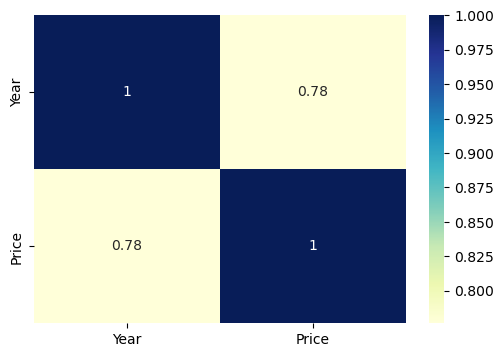

In [7]:
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.plot()

In [8]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [9]:
#Linear relationship between year and price
x=data.drop(['Price'],axis=1)
y=data['Price']

In [10]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [11]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [12]:
# train and test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
#import model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
model=linear_regression.fit(x_train,y_train)
predictions=model.predict(x_test)

In [14]:
# mean square and r square
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error=',mean_squared_error(y_test,predictions))
print('R Squared Value=',r2_score(y_test,predictions))

Mean Squared Error= 4326906256.829671
R Squared Value= 0.36759313425902185


# Possible price of 2022

In [15]:
predictions=model.predict([[2022]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
predictions

array([743601.61594504])

# Lasso Regression

In [17]:
from sklearn.linear_model import Lasso

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
las=Lasso(alpha=1.0)
las.fit(x_train,y_train)
predictions=las.predict(x_test)

In [20]:
predictions

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507495, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507495, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507495, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [21]:
# mean square and r square
print('Mean Squared Error=',mean_squared_error(y_test,predictions))
print('R Squared Value=',r2_score(y_test,predictions))

Mean Squared Error= 4326859771.015768
R Squared Value= 0.3675999284778302
